<center>
    <img src="https://i.ibb.co/wQg0qzq/Banner.png" width="900" alt="KCode Banner"  />
</center>
<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto: kauemandarino@gmail.com"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=5541991835800&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>




# Regressão linear múltipla

## Objetivos:
*   Usar a biblioteca scikit-learn para implantar um modelo de Regressão Linear Múltiplo   
*   Criar, treinar e testar o modelo.

<h1>Índice</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href=#Criando_DF>Criando DataFrame</a></li>
        <li><a href=#Entendendo_dados>Entendendo os dados</a></li>
        <li><a href=#Treino_Teste>Treino e teste</a></li>
        <li><a href=#Regressao>Modelo de regressão linear múltipla</a></li>
    </ol>
</div>
<br>
<hr>

<h2 id="xxx">xxx</h2>

### Importando bibliotecas e recursos pertinentes

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


## <h2 id="Criando_DF">Criando DataFrame</h2>

In [3]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.drop(columns=['FUELCONSUMPTION_COMB_MPG'], inplace=True) # Excluindo coluna redundante
df.head() # Dando uma olhada no DataFrame




,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


## <h2 id="Entendendo_dados">Entendendo os dados</h2>


### `FuelConsumptionCo2.csv`:


Fizemos o download de um conjunto de dados, **`FuelConsuptionCo2.csv`**, de consumo de combustível, que contém consumo de combustível de modelos específicos e taxas estimadas de emissão de dioxido de carbono, para veículos leves novos à venda varejo no Canadá. [Fonte](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


*   **MODELYEAR** e.g. 2014 - **Ano do Modelo**
*   **MAKE** e.g. Acura - **Fabricante**
*   **MODEL** e.g. ILX - **Modelo**
*   **VEHICLE CLASS** e.g. SUV - **Classe do veículo**
*   **ENGINE SIZE** e.g. 4.7 - **Tamanho do motor**
*   **CYLINDERS** e.g 6 - **Número de cilindros**
*   **TRANSMISSION** e.g. A6 - Transmissão
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9 - **Consumo de combústivel L/100km na cidade**
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9 - **Consumo de combústivel L/100km na BR**
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2 - **Consumo de combústivel L/100km Combinado**
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low -->  - **Emissão de Co2** 


Vamos agora selecionar umas características que usaremos para a regressão


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


## <h2 id="Treino_Teste">Treino e teste</h2>

A divisão de treinamento/teste envolve a divisão do conjunto de dados em conjuntos de treinamento e teste, respectivamente, que são mutuamente exclusivos. Depois disso, vamos treinar com o conjunto de treinamento e testar com o conjunto de teste.
Isso fornecerá uma avaliação mais precisa da precisão fora da amostra porque o conjunto de dados de teste não faz parte do conjunto de dados que foi usado para treinar o modelo. Portanto, isso nos dá uma melhor compreensão de quão bem nosso modelo generaliza em novos dados.

Sabemos o resultado de cada ponto de dados no conjunto de dados de teste, tornando-o ótimo para testar! Como esses dados não foram usados para treinar o modelo, o modelo não tem conhecimento do resultado desses pontos de dados. Então, em essência, é realmente um teste fora da amostra.

Vamos dividir nosso conjunto de dados em conjuntos de treinamento e teste. Cerca de 80% de todo o conjunto de dados será usado para treinamento e 20% para teste. Criamos uma máscara para selecionar linhas aleatórias usando a função **np.random.rand()**:

In [6]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Distribuição do treino de dados

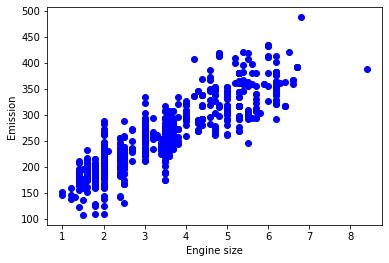

In [7]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

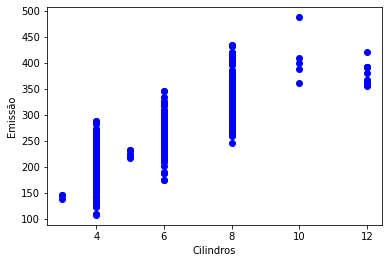

In [10]:
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Cilindros")
plt.ylabel("Emissão")
plt.show()

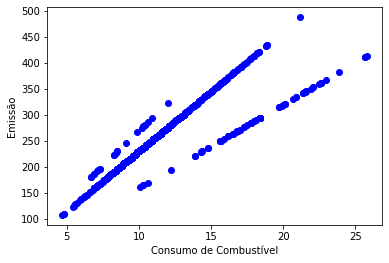

In [11]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Consumo de Combustível")
plt.ylabel("Emissão")
plt.show()

In [8]:
ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS'],
      dtype='object')

<h2 id="Regressao">Modelo de regressão linear múltipla</h2>